In [3]:
import numpy as np
import matplotlib .pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier

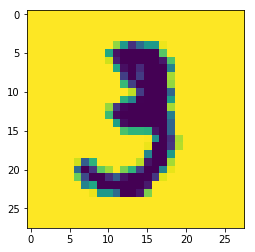

In [15]:
img_arr = plt.imread('./data/3/3_2.bmp')
img_arr.shape
plt.imshow(img_arr)

In [16]:
img_arr.shape

(28, 28)

### 样本数据的提取
- 特征：每一张图片对应的numpy数组
- 目标：0,1,2,3,4,5,6,7,8,9
    

In [9]:
feature = []
target = []
for i in range(10):#i:0-9表示的是文件夹的名称
    for j in range(1,501):#j:1-500表示的是图片的名称的一部分
        imgPath = './data/'+str(i)+'/'+str(i)+'_'+str(j)+'.bmp'
        img_arr = plt.imread(imgPath)
        feature.append(img_arr)
        target.append(i)

In [13]:
feature = np.array(feature) #feature是一个三维的数组
target = np.array(target)

In [14]:
feature.shape

(5000, 28, 28)

- feature目前是三维的numpy数组。必须变形成二维的才可以作为特征数据

In [18]:
feature = feature.reshape(5000,784)

In [19]:
feature.shape

(5000, 784)

- 进行样本数据的打乱

In [24]:
np.random.seed(10)
np.random.shuffle(feature)
np.random.seed(10)
np.random.shuffle(target)

- 对样本数据进行拆分
    - 测试数据
    - 训练数据

In [23]:
#训练数据是以train结尾的
x_train = feature[:4950]
y_train = target[:4950]
#测试数据是以test结尾的
x_test = feature[4950:]
y_test = target[4950:]

In [34]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.96

In [35]:
#对模型进行测试
print('真实的结果：',y_test)
print('模型分类的结果：',knn.predict(x_test))

真实的结果： [1 2 2 3 9 1 7 9 8 5 5 4 9 0 7 0 3 5 0 7 2 7 1 2 0 8 8 6 1 1 6 6 4 4 0 8 5
 8 2 2 4 3 3 9 4 2 6 2 9 2]
模型分类的结果： [1 2 2 3 9 1 7 9 8 5 5 4 9 0 7 0 3 6 0 7 2 7 1 2 0 8 8 6 1 1 6 6 4 4 0 8 5
 8 2 2 4 3 3 9 4 1 6 2 9 2]


- 保存训练好的模型

In [37]:
from sklearn.externals import joblib
#保存
joblib.dump(knn,'./knn.m')

['./knn.m']

In [39]:
#读取
knn = joblib.load('./knn.m')
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

- 将外部图片带入模型进行分类的测试

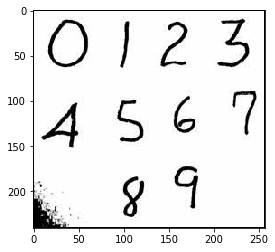

In [44]:
img_arr = plt.imread('./数字.jpg')
plt.imshow(img_arr)

In [45]:
img_arr.shape

(241, 257, 3)

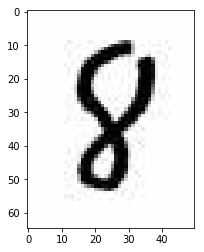

In [53]:
eight_arr = img_arr[175:240,85:135]
plt.imshow(eight_arr)

In [54]:
eight_arr.shape

(65, 50, 3)

- 模型只可以测试类似于测试数据中的特征数据


In [55]:
x_test[4].shape

(784,)

In [56]:
#将8对应的图片进行降维(65, 50, 3)降低成(784,)
eight_arr = eight_arr.mean(axis=2)

In [59]:
eight_arr.shape

(65, 50)

In [60]:
#进行图片像素的等比例压缩
import scipy.ndimage as ndimage
eight_arr = ndimage.zoom(eight_arr,zoom=(28/65,28/50))

In [62]:
eight_arr = eight_arr.reshape(1,784)

In [63]:
eight_arr.shape

(1, 784)

In [64]:
knn.predict(eight_arr)

array([8])